In [14]:
import first
import pandas as pd
import thinkstats2
import thinkplot
import numpy as np

**Exercise 7.1** Using data from the NSFG, make a scatter plot of birth weight
versus mother’s age. Plot percentiles of birth weight versus mother’s age.
Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables?

In [3]:
live, firsts, others = first.MakeFrames()
live = live.dropna(subset=['agepreg', 'totalwgt_lb'])

In [10]:
# Solution
ages = live.agepreg
weights = live.totalwgt_lb
#Using Pandas native methods
print('Corr', ages.corr(weights, method='pearson'))
print('SpearmanCorr', ages.corr(weights, method='spearman'))

Corr 0.0688339703541091
SpearmanCorr 0.09461004109658226


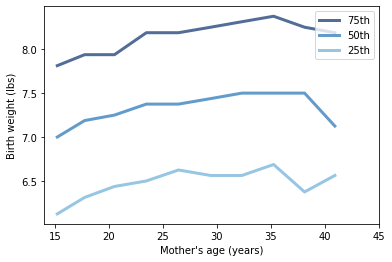

In [15]:
# Solution

def BinnedPercentiles(df):
    """Bin the data by age and plot percentiles of weight for each bin.

    df: DataFrame
    """
    bins = np.arange(10, 48, 3)
    indices = np.digitize(df.agepreg, bins)
    groups = df.groupby(indices)

    ages = [group.agepreg.mean() for i, group in groups][1:-1]
    cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups][1:-1]

    thinkplot.PrePlot(3)
    for percent in [75, 50, 25]:
        weights = [cdf.Percentile(percent) for cdf in cdfs]
        label = '%dth' % percent
        thinkplot.Plot(ages, weights, label=label)

    thinkplot.Config(xlabel="Mother's age (years)",
                     ylabel='Birth weight (lbs)',
                     xlim=[14, 45], legend=True)
    
BinnedPercentiles(live)

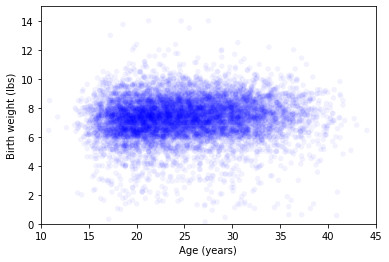

In [16]:
# Solution

def ScatterPlot(ages, weights, alpha=1.0, s=20):
    """Make a scatter plot and save it.

    ages: sequence of float
    weights: sequence of float
    alpha: float
    """
    thinkplot.Scatter(ages, weights, alpha=alpha)
    thinkplot.Config(xlabel='Age (years)',
                     ylabel='Birth weight (lbs)',
                     xlim=[10, 45],
                     ylim=[0, 15],
                     legend=False)
    
ScatterPlot(ages, weights, alpha=0.05, s=10)

In [ ]:
# Conclusions:

# 1) The scatterplot shows a weak relationship between the variables but
#    it is hard to see clearly.

# 2) The correlations support this.  Pearson's is around 0.07, Spearman's
#    is around 0.09.  The difference between them suggests some influence
#    of outliers or a non-linear relationsip.

# 3) Plotting percentiles of weight versus age suggests that the
#    relationship is non-linear.  Birth weight increases more quickly
#    in the range of mother's age from 15 to 25.  After that, the effect
#    is weaker.